# Netflix Dataset EDA

In this notebook, I will perform an exploratory data analysis on the Netflix dataset. The dataset contains information about the movies and TV shows available on Netflix.



First, I install the essential libraries for loading the data into a pandas dataframe and performing the pre-processing steps. For the visualization, I use the matplotlib and seaborn libraries.

In [1]:
# importing essential libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

The dataset is consisted of five sheets. I will load each sheet into a separate pandas dataframe and perform EDA on each sheet separately.

In [2]:
# load the xlsx data to a pandas df
xl = pd.ExcelFile('netflix_titles.xlsx')
# print the name of the sheets
xl.sheet_names

['netflix_titles',
 'netflix_titles_directors',
 'netflix_titles_countries',
 'netflix_titles_cast',
 'netflix_titles_category']

since we are going to change the data, we will make a copy of the original data to keep the original data unchanged. we will save each corrected sheet in the new xlsx file with the same name of the original sheet.

In [3]:
# make a copy of the data with _clean suffix
import shutil
shutil.copy('netflix_titles.xlsx', 'netflix_titles_clean.xlsx')

'netflix_titles_clean.xlsx'

# `netflix_titles` sheet

## Data overview and initial inspection
The first sheet which is now a pandas dataframe is `netflix_titles`. Similar to the most of the EDA pipelines, I will check the following:

1. The first few rows of the dataframe to understand the structure of the data. (`df.head()`)
2. The shape of the dataframe to understand the number of rows and columns. (`df.shape`)
3. The data types of the columns to understand the data types of the columns. (`df.dtypes`)
4. The missing values in the dataframe to understand the missing values in the dataframe. (`df.isnull().sum()`)

In [4]:
# Load the data from the 'netflix_titles' sheet
titles_df = pd.read_excel(xl, sheet_name='netflix_titles')

# 1. Display the first 5 rows of the dataset
titles_df.head()

,duration_minutes,duration_seasons,type,title,date_added,release_year,rating,description,show_id
0,90,NaN,Movie,Norm of the North: King Sized Adventure,2019-09-09 00:00:00,2019.0,TV-PG,Before planning an awesome wedding for his gra...,81145628.0
1,94,NaN,Movie,Jandino: Whatever it Takes,2016-09-09 00:00:00,2016.0,TV-MA,Jandino Asporaat riffs on the challenges of ra...,80117401.0
2,NaN,1,TV Show,Transformers Prime,2018-09-08 00:00:00,2013.0,TV-Y7-FV,"With the help of three human allies, the Autob...",70234439.0
3,NaN,1,TV Show,Transformers: Robots in Disguise,2018-09-08 00:00:00,2016.0,TV-Y7,When a prison ship crash unleashes hundreds of...,80058654.0
4,99,NaN,Movie,#realityhigh,2017-09-08 00:00:00,2017.0,TV-14,When nerdy high schooler Dani finally attracts...,80125979.0


In [5]:
# 2. display the shape of the dataset
print("Dataset has {} rows and {} columns".format(titles_df.shape[0], titles_df.shape[1]))

Dataset has 6236 rows and 9 columns


In [6]:
# 3. display the data type of each column
titles_df.dtypes

duration_minutes     object
duration_seasons     object
type                 object
title                object
date_added           object
release_year        float64
rating               object
description          object
show_id             float64
dtype: object

We know that some of the columns need to be converted to the correct data types. The conversion map table is as follows:




| Column Name | Correct Data Type |
|-------------|-------------------|
| `show_id` | `int` |
| `duration_minutes` | `int` |
| `duration_seasons` | `int` |
| `type` | `category` |
| `title` | `object` |
| `date_added` | `datetime` |
| `release_year` | `int` |
| `rating` | `category` |
| `description` | `object` |


duration_minutes    1969
duration_seasons    4265
type                   1
title                  1
date_added            13
release_year           2
rating                13
description            3
show_id                4
dtype: int64

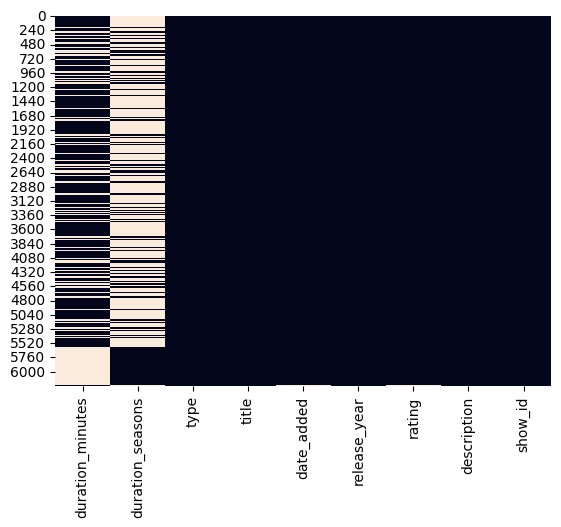

In [7]:
# 4. display the number of missing values in each column
sns.heatmap(titles_df.isnull(), cbar=False)
titles_df.isnull().sum()

It makes sense to have missing values in `duration_minutes` or `duration_seconds` columns as these two columns are describing **movie** vs **tv show** duration.

But it doesn't make sense to have missing values in `show_id` column as it is the unique identifier for each show. I will remove these rows from the dataframe for consistency. But first, I will check these rows.

**Note:** report to data engineering team

In [8]:
# show rows with missing values in the show_id column
titles_df[titles_df['show_id'].isnull()]

,duration_minutes,duration_seasons,type,title,date_added,release_year,rating,description,show_id
2017,40,NaN,Movie,The Memphis Belle: A Story of a,NaN,NaN,NaN,NaN,NaN
2018,"Flying Fortress""",2017-03-31 00:00:00,1944,TV-PG,This documentary centers on the crew of the B-...,80119194.0,NaN,NaN,NaN
4524,87,NaN,Movie,The Bad Education Movie,2018-12-15 00:00:00,2015.0,TV-MA,Britain's most ineffective but caring teacher ...,NaN
4525,"and probably will.""",80188902,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Looks like there has been a mistake in putting the data into the correct fields. I will remove the rows with this issue for consistency. But we need to report this issue to the data engineering team to add extra validation checks to the data pipeline.

We will also check if there are any duplicate rows in the dataframe. (`df.duplicated(keep=False)`) If there are any duplicate rows, we will remove them.

Similar to the previous step, I will remove the duplicate rows for consistency. But we need to report this issue to the data engineering team to add extra validation checks to the data pipeline.

In [9]:
# show duplicated rows
# in order to see the duplicated rows, we need to first set the 'show_id' column as the index and then use the duplicated() method
# since we will set the `show_id` as index in the next section, we will create a temporary variable for `titles_df` to avoid overwriting the original dataset
temp_titles_df = titles_df.copy()
temp_titles_df.set_index('show_id', inplace=True)
temp_titles_df[temp_titles_df.duplicated(keep=False)]

,duration_minutes,duration_seasons,type,title,date_added,release_year,rating,description
show_id,,,,,,,,
81075235.0,162,NaN,Movie,Sarkar,2019-03-02 00:00:00,2018.0,TV-MA,A ruthless businessman’s mission to expose ele...
81072516.0,162,NaN,Movie,Sarkar,2019-03-02 00:00:00,2018.0,TV-MA,A ruthless businessman’s mission to expose ele...


## Data cleaning and preprocessing
After the initial inspection, I will perform the following data cleaning and preprocessing steps:

1. set the `show_id` column as the index of the dataframe.
2. remove the duplicate rows from the dataframe.
3. remove the rows with missing values in the `show_id` column.
4. Convert the columns to the correct data types.

In [10]:
# 1. set the show_id as the index
titles_df.set_index('show_id', inplace=True)
titles_df.head()

,duration_minutes,duration_seasons,type,title,date_added,release_year,rating,description
show_id,,,,,,,,
81145628.0,90,NaN,Movie,Norm of the North: King Sized Adventure,2019-09-09 00:00:00,2019.0,TV-PG,Before planning an awesome wedding for his gra...
80117401.0,94,NaN,Movie,Jandino: Whatever it Takes,2016-09-09 00:00:00,2016.0,TV-MA,Jandino Asporaat riffs on the challenges of ra...
70234439.0,NaN,1,TV Show,Transformers Prime,2018-09-08 00:00:00,2013.0,TV-Y7-FV,"With the help of three human allies, the Autob..."
80058654.0,NaN,1,TV Show,Transformers: Robots in Disguise,2018-09-08 00:00:00,2016.0,TV-Y7,When a prison ship crash unleashes hundreds of...
80125979.0,99,NaN,Movie,#realityhigh,2017-09-08 00:00:00,2017.0,TV-14,When nerdy high schooler Dani finally attracts...


In [11]:
# 2. remove the duplicated rows
titles_df.drop_duplicates(inplace=True)

In [12]:
# 3. remove the rows with missing values in the show_id column
# i.e., remove the rows with missing values in the index column
titles_df = titles_df[~titles_df.index.isnull()]

In [13]:
# 4. convert the data type of the columns to the appropriate data type
titles_df['duration_minutes'] = titles_df['duration_minutes'].astype(pd.Int64Dtype())
titles_df['duration_seasons'] = titles_df['duration_seasons'].astype(pd.Int64Dtype())
titles_df['type'] = titles_df['type'].astype(pd.CategoricalDtype())
titles_df['date_added'] = pd.to_datetime(titles_df['date_added'])
titles_df['release_year'] = titles_df['release_year'].astype(pd.Int64Dtype())
titles_df['rating'] = titles_df['rating'].astype(pd.CategoricalDtype())
titles_df['description'] = titles_df['description'].astype(pd.StringDtype())

# display the data type of each column
titles_df.dtypes

duration_minutes             Int64
duration_seasons             Int64
type                      category
title                       object
date_added          datetime64[ns]
release_year                 Int64
rating                    category
description         string[python]
dtype: object

Once the data cleaning and preprocessing steps are completed, we can see the updated data types of the columns, the shape of the dataframe, and the missing values in the dataframe.

In [14]:
titles_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6231 entries, 81145628.0 to 70153404.0
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   duration_minutes  4262 non-null   Int64         
 1   duration_seasons  1969 non-null   Int64         
 2   type              6231 non-null   category      
 3   title             6231 non-null   object        
 4   date_added        6220 non-null   datetime64[ns]
 5   release_year      6231 non-null   Int64         
 6   rating            6221 non-null   category      
 7   description       6231 non-null   string        
dtypes: Int64(3), category(2), datetime64[ns](1), object(1), string(1)
memory usage: 372.0+ KB


Once we are done with the pre-processing, we will save the cleaned dataframe to a new excel file with the same name as the original sheet.

In [15]:
# Override the netlix_titles sheet in the excel file named netflix_titles_clean.xlsx
with pd.ExcelWriter("netflix_titles_clean.xlsx", engine="openpyxl", mode="a", if_sheet_exists="replace") as writer:
    titles_df.to_excel(writer, 'netflix_titles', index=True)

/var/folders/5g/vyclnqvs2fs40lmmnbvkyxvw0000gn/T/ipykernel_17708/27479369.py:3: FutureWarning: Starting with pandas version 3.0 all arguments of to_excel except for the argument 'excel_writer' will be keyword-only.
  titles_df.to_excel(writer, 'netflix_titles', index=True)
